In [ ]:
pip uninstall dlib 

Found existing installation: dlib 19.18.0
Uninstalling dlib-19.18.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/dlib-19.18.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/dlib.cpython-37m-x86_64-linux-gnu.so
Proceed (y/n)? y
y
yy
  Successfully uninstalled dlib-19.18.0


In [ ]:
!git clone https://github.com/davisking/dlib.git

Cloning into 'dlib'...
remote: Enumerating objects: 49295, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 49295 (delta 46), reused 35 (delta 16), pack-reused 49180
Receiving objects: 100% (49295/49295), 24.45 MiB | 20.69 MiB/s, done.
Resolving deltas: 100% (34658/34658), done.


In [ ]:
cd dlib

/content/dlib


In [ ]:
!mkdir build

In [ ]:
cd build

/content/dlib/build


In [ ]:
!cmake .. -DDLIB_USE_CUDA=0 -DUSE_AVX_INSTRUCTIONS=1

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Using CMake version: 3.12.0
-- Compiling dlib version: 19.22.99
-- Enabling AVX instructions
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - 

In [ ]:
!cmake --build .

Scanning dependencies of target dlib
[  1%] Building CXX object dlib/CMakeFiles/dlib.dir/base64/base64_kernel_1.cpp.o
[  3%] Building CXX object dlib/CMakeFiles/dlib.dir/bigint/bigint_kernel_1.cpp.o
[  5%] Building CXX object dlib/CMakeFiles/dlib.dir/bigint/bigint_kernel_2.cpp.o
[  6%] Building CXX object dlib/CMakeFiles/dlib.dir/bit_stream/bit_stream_kernel_1.cpp.o
[  8%] Building CXX object dlib/CMakeFiles/dlib.dir/entropy_decoder/entropy_decoder_kernel_1.cpp.o
[ 10%] Building CXX object dlib/CMakeFiles/dlib.dir/entropy_decoder/entropy_decoder_kernel_2.cpp.o
[ 11%] Building CXX object dlib/CMakeFiles/dlib.dir/entropy_encoder/entropy_encoder_kernel_1.cpp.o
[ 13%] Building CXX object dlib/CMakeFiles/dlib.dir/entropy_encoder/entropy_encoder_kernel_2.cpp.o
[ 15%] Building CXX object dlib/CMakeFiles/dlib.dir/md5/md5_kernel_1.cpp.o
[ 16%] Building CXX object dlib/CMakeFiles/dlib.dir/tokenizer/tokenizer_kernel_1.cpp.o
[ 18%] Building CXX object dlib/CMakeFiles/dlib.dir/unicode/unicode.cpp.o

In [ ]:
cd ..

/content/dlib


In [ ]:
!ls

build		dlib  examples		 LICENSE.txt  python_examples  setup.py
CMakeLists.txt	docs  ISSUE_TEMPLATE.md  MANIFEST.in  README.md        tools


In [ ]:
!python setup.py install --no DLIB_USE_CUDA

running install
running bdist_egg
running egg_info
creating tools/python/dlib.egg-info
writing tools/python/dlib.egg-info/PKG-INFO
writing dependency_links to tools/python/dlib.egg-info/dependency_links.txt
writing top-level names to tools/python/dlib.egg-info/top_level.txt
writing manifest file 'tools/python/dlib.egg-info/SOURCES.txt'
package init file 'tools/python/dlib/__init__.py' not found (or not a regular file)
reading manifest template 'MANIFEST.in'
no previously-included directories found matching 'tools/python/build*'
no previously-included directories found matching 'dlib/cmake_utils/*/build*'
adding license file 'LICENSE.txt'
writing manifest file 'tools/python/dlib.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
Building extension for Python 3.7.12 (default, Sep 10 2021, 00:21:48) 
Invoking CMake setup: 'cmake /content/dlib/tools/python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=/content/dlib/build/

**Теперь нужно перезапустить среду выполнения!!!**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import dlib
from skimage import io
from scipy.spatial import distance

In [3]:
dlib.DLIB_USE_CUDA

True

In [4]:
sp = dlib.shape_predictor('/content/drive/My Drive/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('/content/drive/My Drive/dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()

In [5]:
dlib.__version__

'19.18.0'

In [6]:
img     = io.imread('/content/drive/My Drive/PhotoOne.jpg')
img_src = io.imread('/content/drive/My Drive/PhotoOne.jpg')

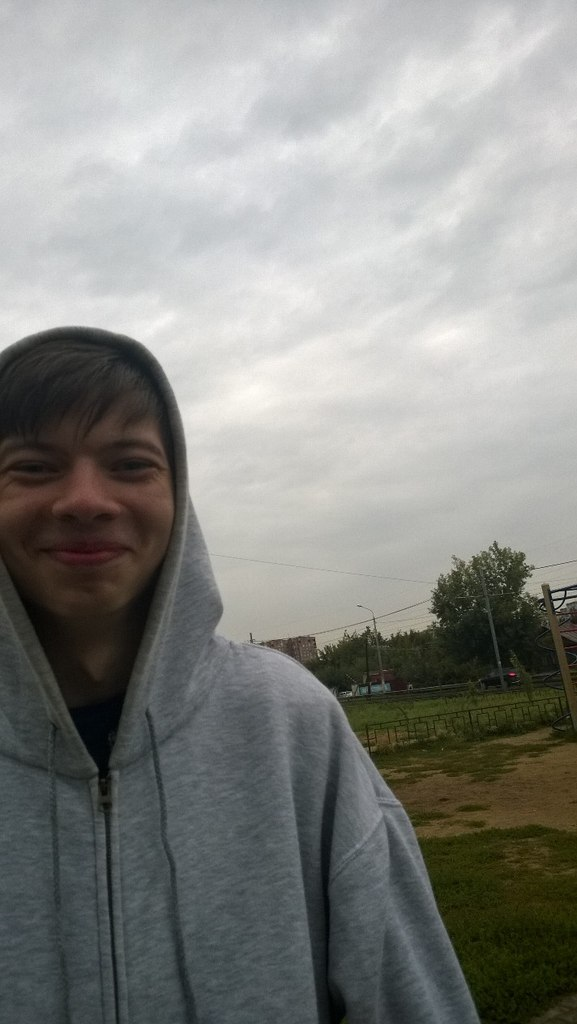

In [7]:
from IPython.display import Image
Image('/content/drive/My Drive/PhotoOne.jpg')

In [8]:
dets = detector(img_src, 1)

In [9]:
dets[0].left()

-27

In [10]:
for k, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    
shape = sp(img_src, d)    

Detection 0: Left: -27 Top: 428 Right: 180 Bottom: 614


In [ ]:
shape

In [11]:
import cv2

In [12]:
import numpy as np
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

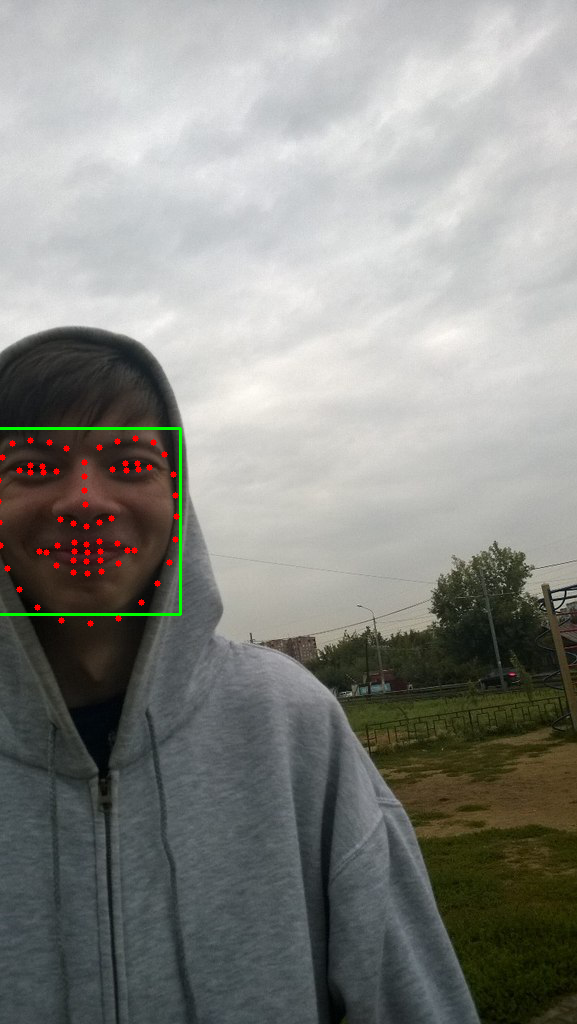

In [13]:
from google.colab.patches import cv2_imshow
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.rectangle(img, (dets[0].left(), dets[0].top()), (dets[0].right(), dets[0].bottom()), (0, 255, 0, 255), 2)

shapex = shape_to_np(shape)

for (x, y) in shapex:
		cv2.circle(img, (x, y), 3, (0, 0, 255), -1)

cv2_imshow(img)

In [14]:
face_descriptor1 = facerec.compute_face_descriptor(img_src, shape)

In [15]:
face_descriptor1

dlib.vector([-0.105143, 0.0372529, -0.00267245, -0.0972518, -0.117047, -0.101892, 0.0103965, -0.119355, 0.165151, -0.0784029, 0.220966, 0.0421864, -0.17067, -0.149023, 0.0623756, 0.107364, -0.190601, -0.0961933, -0.0442844, -0.0615053, 0.116162, 0.0235362, 0.0703053, 0.161976, -0.0909286, -0.365748, -0.122152, -0.155391, 0.0690181, 0.0151745, 0.047803, 0.0365688, -0.139784, -0.044059, -0.00336023, 0.022579, -0.0362153, -0.0777368, 0.166651, 0.0055103, -0.217705, 0.0149784, -0.0223988, 0.217731, 0.168914, 0.0236283, 0.0677976, -0.0438667, 0.144642, -0.180435, -0.000818241, 0.1419, 0.0872813, 0.00243602, 0.0425935, -0.101159, 0.0796307, 0.132047, -0.348152, 0.0271999, 0.00137622, -0.162822, -0.00438771, -0.0587665, 0.207314, 0.123797, -0.13354, -0.118483, 0.142931, -0.231306, -0.0621924, 0.0708192, -0.153653, -0.186273, -0.288297, 0.0203827, 0.389141, 0.161568, -0.134222, 0.0327832, -0.112188, 0.00713471, 0.0544153, 0.119524, -0.0434899, -0.0401603, -0.114359, -0.0290018, 0.119531, -0.02

In [16]:
img_2     = io.imread('/content/drive/My Drive/PhotoTwo.jpg')
img_src_2 = io.imread('/content/drive/My Drive/PhotoTwo.jpg')

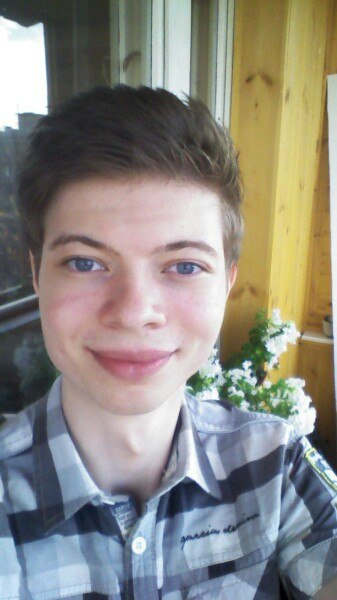

In [17]:
from IPython.display import Image
Image('/content/drive/My Drive/PhotoTwo.jpg')

In [18]:
dets_2 = detector(img_src_2, 1)

In [19]:
for k, d in enumerate(dets_2):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    
shape_2 = sp(img_src_2, d)  

Detection 0: Left: 18 Top: 192 Right: 241 Bottom: 415


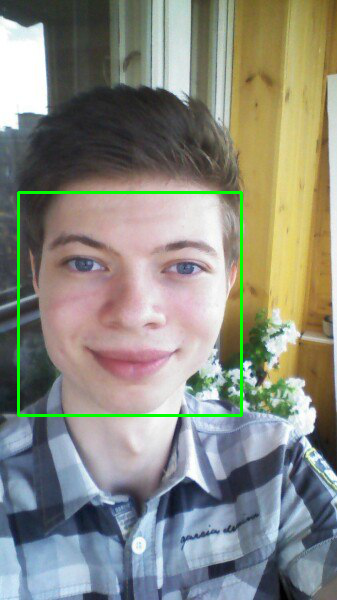

In [20]:
cv2.rectangle(img_2, (dets_2[0].left(), dets_2[0].top()), (dets_2[0].right(), dets_2[0].bottom()), (0, 255, 0, 255), 2)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_RGB2BGR)
cv2_imshow(img_2)

In [21]:
face_descriptor2 = facerec.compute_face_descriptor(img_src_2, shape_2)

In [22]:
a = distance.euclidean(face_descriptor1, face_descriptor2)
print(a)

0.349940255551496


In [23]:
img_b     = io.imread('/content/drive/My Drive/MadsMikkelsen.jpg')
img_src_b = io.imread('/content/drive/My Drive/MadsMikkelsen.jpg')

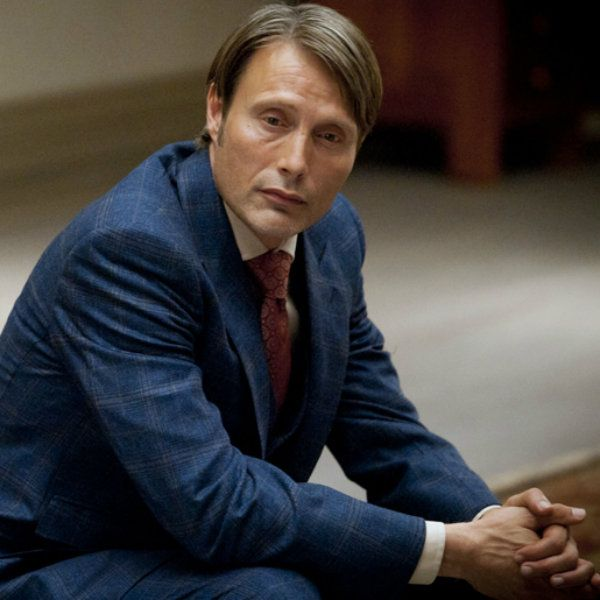

In [24]:
from IPython.display import Image
Image('/content/drive/My Drive/MadsMikkelsen.jpg')

In [25]:
dets_b = detector(img_src_b, 1)

In [26]:
for k, d in enumerate(dets_b):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    
shape_b = sp(img_src_b, d)  

Detection 0: Left: 218 Top: 81 Right: 373 Bottom: 236


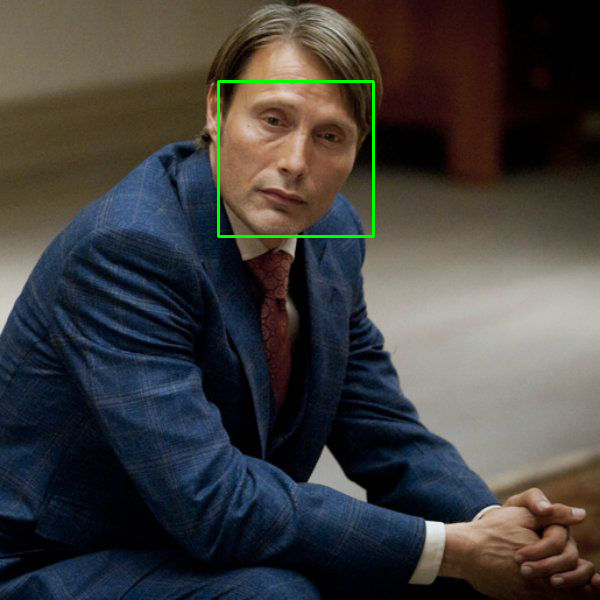

In [27]:
cv2.rectangle(img_b, (dets_b[0].left(), dets_b[0].top()), (dets_b[0].right(), dets_b[0].bottom()), (0, 255, 0, 255), 2)
img_b = cv2.cvtColor(img_b, cv2.COLOR_RGB2BGR)
cv2_imshow(img_b)

In [28]:
face_descriptorb = facerec.compute_face_descriptor(img_src_b, shape_b)

In [29]:
a = distance.euclidean(face_descriptor1, face_descriptorb)
print(a)

0.9216269060502326


In [30]:
a = distance.euclidean(face_descriptor2, face_descriptorb)
print(a)

0.9178316042758137
